# Using GPs.jl

In [1]:
using LinearAlgebra
using Plots
using Distributions
using Random; Random.seed!(1234);

In [2]:
include("../src/GP.jl")
using .GPs

In [3]:
function visualize_kernel(k; noise=0.2, n_samples=10, Xs=0:0.01:5)
    # 1. Plot prior 
    f = GP(k)
    p1 = plot(Xs, f(Xs), label="")
    plot!(p1, Xs, rand(f(Xs), 5), label="")
    
    # 2. Draw some samples from a GP realization
    y = f + GP(GPs.noise([noise]))
    n = n_samples
    X̂ = rand(n).*(maximum(Xs)-minimum(Xs)) .+ minimum(Xs)
    ŷ = rand(y(X̂))
    
    # 3. Condition on these samples
    Δy = ŷ - f.μ(X̂)
    K_inv = inv(Symmetric(y.k(X̂, X̂) + 1e-6*I))
    
    μ(x) = f.μ(x) .+ f.k(x, X̂) * K_inv * Δy
    _k(x₁, x₂) = f.k(x₁, x₂) - f.k(x₁, X̂) * K_inv * f.k(X̂, x₂)
    
    f′ = GPs.GP(μ, _k)
    
    # 4. Plot posterior
    p2 = plot(Xs, f′(Xs), width=4, label="Posterior")
    scatter!(p2, X̂, ŷ, color=2, label="Measurements")
    plot!(p2, Xs, rand(f′(Xs), 5), width=0.5, label="")
    
    plot(p1, p2, size=(900, 400))
end

visualize_kernel (generic function with 1 method)

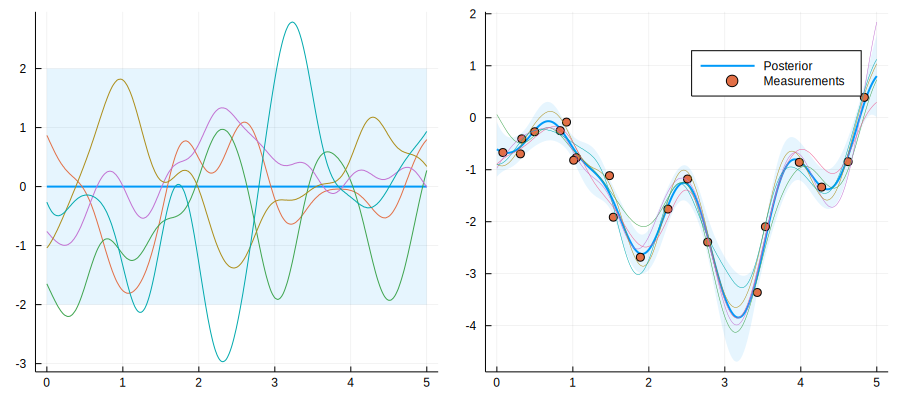

In [4]:
# RBF
visualize_kernel(rbf([0.5], [1,]), noise=0.2, n_samples=20)

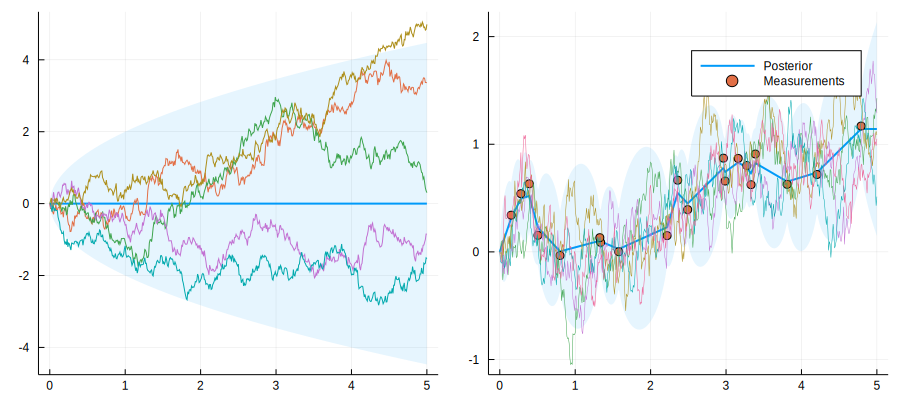

In [5]:
# Wiener Process
visualize_kernel((x1, x2) -> min.(x1, x2'), noise=0.2, n_samples=20)

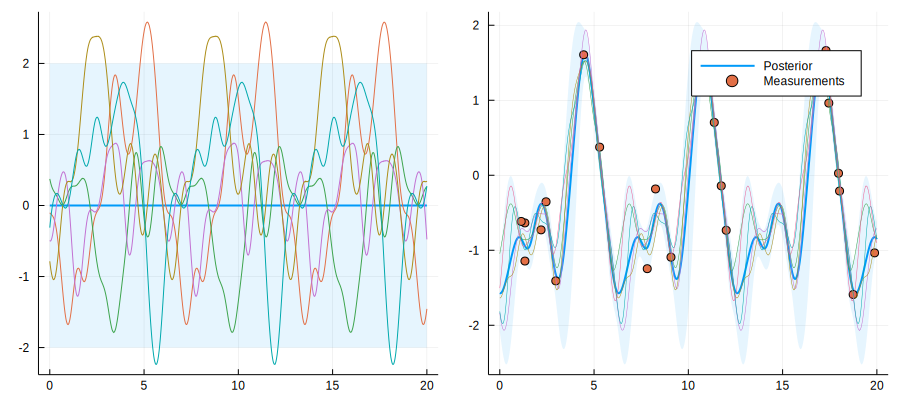

In [6]:
# Periodic
σ = 1
l = 0.5
visualize_kernel((x1, x2) -> σ^2 .* exp.(-2 .* sin.(abs.(x1 .- x2') ./ 2).^2 ./ l^2),
    noise=0.2, n_samples=20, Xs=0:0.01:20)

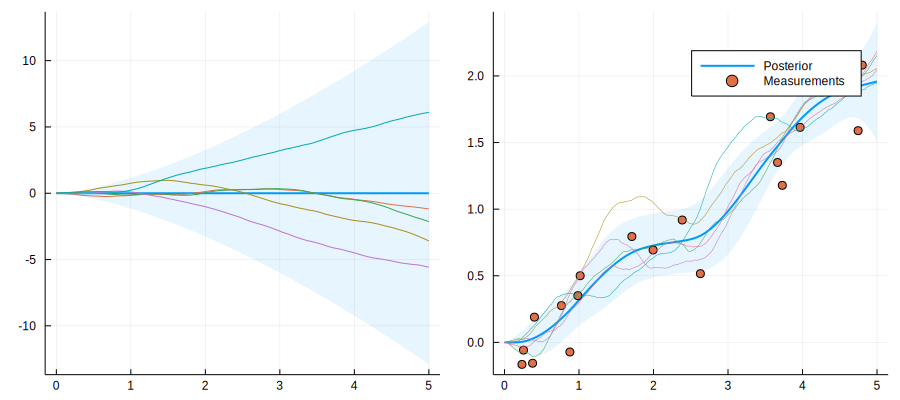

In [7]:
# Wiener velocity
wiener_velocity(x1, x2) = 1 .* ( min.(x1, x2').^3 ./ 3 .+ abs.(x1 .- x2') .* min.(x1, x2').^2 ./ 2)
visualize_kernel(wiener_velocity, noise=0.2, n_samples=20, Xs=0:0.01:5)

In [ ]:
# Polynomial
σ = 0.1
p = 3
poly(x1, x2) = σ^2 .* (x1 .* x2').^p
visualize_kernel(poly, noise=0.2, n_samples=20, Xs=-2:0.01:2)